# Лабораторная работа 5. Шаргин Иван. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import reduce
from sklearn import linear_model

In [2]:
def f_test(x):
    return np.sin(x) / x

In [3]:
def f_easy_test(x):
    return np.sin(x)

In [67]:
def test(x):
    return np.power(x, 5)

In [56]:
def left_rect(f, section, N):
    x_grid = np.linspace(section[0], section[1], N+1)
    S = 0
    for i in range(N):
        S += f(x_grid[i]) * (x_grid[i+1] - x_grid[i])
    
    return(S)

In [5]:
def grid_left_rect(f_grid, x_grid):
    S = 0
    for x in x_grid:
        if x != x_grid[-1]:
            S += f(x) * h 
    
    return(S)

[0.99741378]


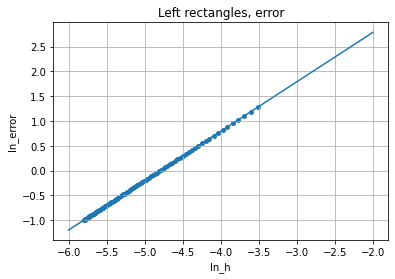

In [68]:
N_arr = np.array(range(100, 1000, 10))
h_arr = 3 / N_arr
error = []
for N in N_arr:
    I = left_rect(test, np.array([0, 3]), N)
    I_precise = 121.5
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Left rectangles, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)

In [7]:
left_rect(f_test, np.array([0.01, math.pi]), h=0.01)

1.8459976326302725

In [51]:
def right_rect(f, section, N):
    x_grid = np.linspace(section[0], section[1], N+1)
    S = 0
    for i in range(N):
        S += f(x_grid[i+1]) * (x_grid[i+1] - x_grid[i])
    
    return(S)

In [9]:
def grid_right_rect(f_grid, x_grid):
    S = 0
    for x in x_grid:
        if x != x_grid[0]:
            S += f(x) * h 
    
    return(S)

[1.00256883]


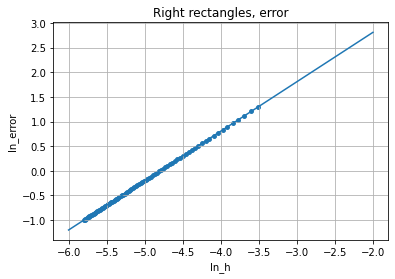

In [69]:
N_arr = np.array(range(100, 1000, 10))
h_arr = 3 / N_arr
error = []
for N in N_arr:
    I = right_rect(test, np.array([0, 3]), N)
    I_precise = 121.5
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Right rectangles, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)

In [29]:
def trapeze(f, section, N): 
    x_grid = np.linspace(section[0], section[1], N+1)
    S = 0
    for i in range(N):
        S += 0.5 * (f(x_grid[i]) + f(x_grid[i+1])) * (x_grid[i+1] - x_grid[i])
    
    return(S)

In [15]:
def trapeze_grid(x_grid, f_grid):
    N = x_grid.size - 1
    S = 0
    for i in range(N):
        S += 0.5 * (f_grid[i] + f_grid[i+1]) * (x_grid[i+1] - x_grid[i])
    
    return(S)

[2.00000966]


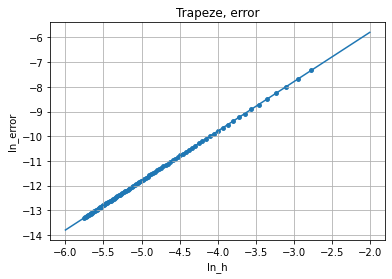

In [30]:
N_arr = np.array(range(50, 1000, 10))
h_arr = math.pi / N_arr
error = []
for N in N_arr:
    I = trapeze(f_easy_test, np.array([0, math.pi]), N)
    I_precise = 2
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Trapeze, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)

## 2. Simpson's method

In [26]:
def Simpson(f, section, N):  
    x_grid = np.linspace(section[0], section[1], N+1)
    S = 0
    for i in range(N):
        x_c = (x_grid[i+1] + x_grid[i]) / 2
        S += 1 / 6 * (f(x_grid[i]) + 4 * f(x_c) + f(x_grid[i+1])) * (x_grid[i+1] - x_grid[i]) 
    
    return(S)

[4.00075551]


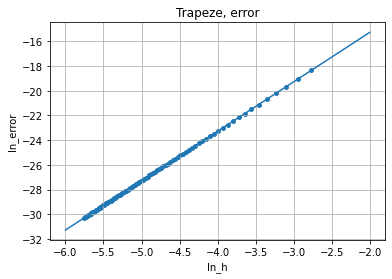

In [31]:
N_arr = np.array(range(50, 1000, 10))
h_arr = math.pi / N_arr
error = []
for N in N_arr:
    I = Simpson(f_easy_test, np.array([0, math.pi]), N)
    I_precise = 2
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Trapeze, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)

In [47]:
def Runge_trapeze(f, section, N):
    I1 = trapeze(f, section, N)
    h1 = (section[1] - section[0]) / N
    I2 = trapeze(f, section, int(N / 2))
    h2 = (section[1] - section[0]) / int(N / 2)
    c = (I1 - I2) / (np.power(h2, 2) - np.power(h1, 2))
    I_r = I1 + c * np.power(h1, 2)
    
    return I_r 

[3.99998536]


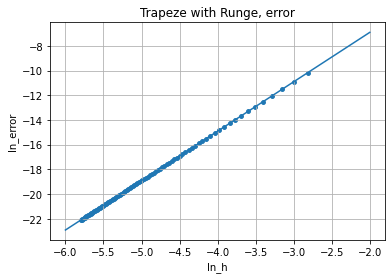

In [76]:
N_arr = np.array(range(50, 1000, 10))
h_arr = 3 / N_arr
error = []
for N in N_arr:
    I = Runge_trapeze(test, np.array([0, 3]), N)
    I_precise = 121.5
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Trapeze with Runge, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)

In [71]:
def Runge_right_rect(f, section, N):
    p = 1
    I1 = right_rect(f, section, N)
    h1 = (section[1] - section[0]) / N
    I2 = right_rect(f, section, int(N / 2))
    h2 = (section[1] - section[0]) / int(N / 2)
    c = (I1 - I2) / (np.power(h2, p) - np.power(h1, p))
    I_r = I1 + c * np.power(h1, p)
    
    return I_r 

[1.99991776]


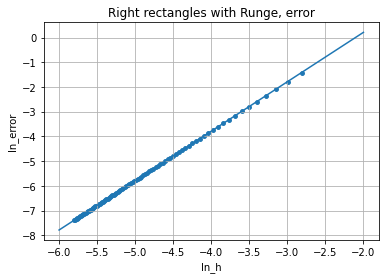

In [74]:
N_arr = np.array(range(50, 1000, 10))
h_arr = 3 / N_arr
error = []
for N in N_arr:
    I = Runge_right_rect(test, np.array([0, 3]), N)
    I_precise = 121.5
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Right rectangles with Runge, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)

In [77]:
def Runge_left_rect(f, section, N):
    p = 1
    I1 = left_rect(f, section, N)
    h1 = (section[1] - section[0]) / N
    I2 = left_rect(f, section, int(N / 2))
    h2 = (section[1] - section[0]) / int(N / 2)
    c = (I1 - I2) / (np.power(h2, p) - np.power(h1, p))
    I_r = I1 + c * np.power(h1, p)
    
    return I_r 

[1.99991776]


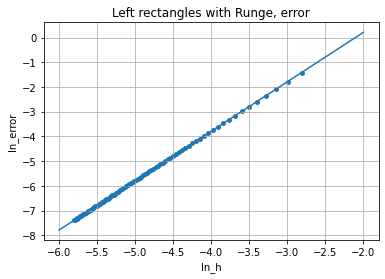

In [79]:
N_arr = np.array(range(50, 1000, 10))
h_arr = 3 / N_arr
error = []
for N in N_arr:
    I = Runge_right_rect(test, np.array([0, 3]), N)
    I_precise = 121.5
    error.append(np.linalg.norm(I - I_precise))

error = np.array(error)
ln_error = np.log(error)
ln_h = np.log(h_arr)

fig, ax = plt.subplots() 
ax.grid()
ax.scatter(ln_h, ln_error, s=15)
plt.xlabel("ln_h")
plt.ylabel("ln_error")
plt.title("Left rectangles with Runge, error")

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ln_h.reshape((ln_h.size, 1)), ln_error)
x0 = np.linspace(-6, -2, 100).reshape((100, 1))
y0 = linear_regressor.predict(x0)
ax.plot(x0, y0)
print(linear_regressor.coef_)